# Import all packages we will use

In [5]:
import numpy as np
import sep
import astropy.io.fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.io import fits

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

# Download FITS image

In [6]:
image_file = '/Users/labuser/Desktop/hudf12_f105w.fits'
image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(3600, 3600)


# Open FITS image

In [30]:
hdu_list = fits.open(image_file)
hdu_list.info()

image_data = hdu_list[0].data

Filename: /Users/labuser/Desktop/hudf12_f105w.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   


# Display image data

In [44]:
print(type(image_data))
print(image_data.shape)

hdu_list.close()

image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)


<class 'numpy.ndarray'>
(3600, 3600)
<class 'numpy.ndarray'>
(3600, 3600)


# Display image data

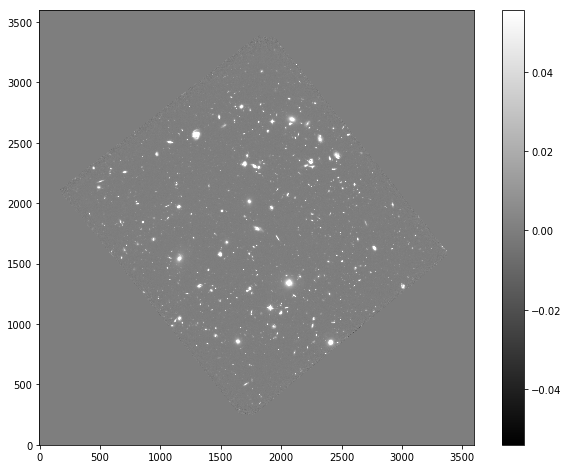

In [42]:
m, s = np.mean(image_data), np.std(image_data)
plt.imshow(image_data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('hudf12_f105w_image.png')

# Subract image background

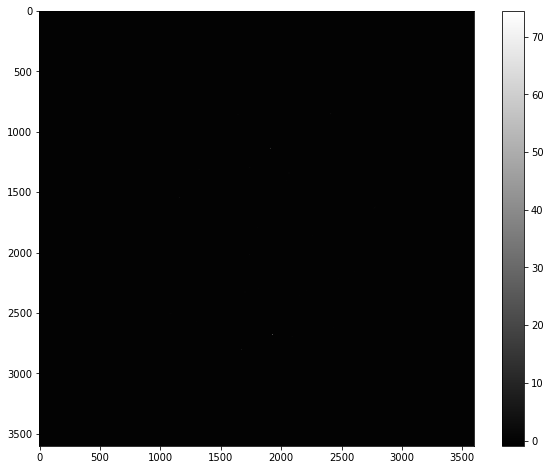

In [66]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

image_data = image_data.byteswap().newbyteorder()


In [82]:
image_data = image_data.byteswap().newbyteorder()

In [83]:
# measure a spatially varying background on the image
bkg = sep.Background(image_data)

In [85]:
bkg = sep.Background(image_data, bw=64, bh=64, fw=3, fh=3)

In [86]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [87]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

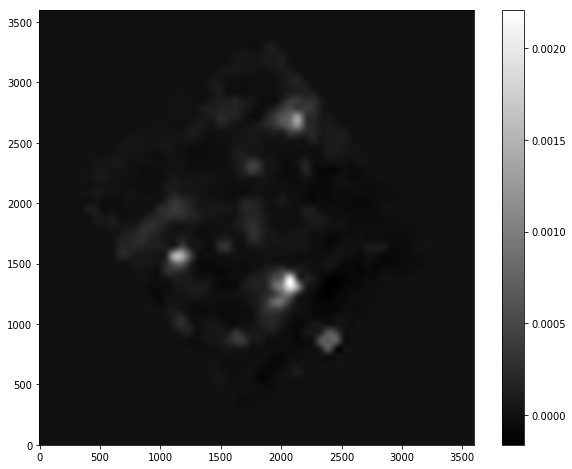

In [88]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [89]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

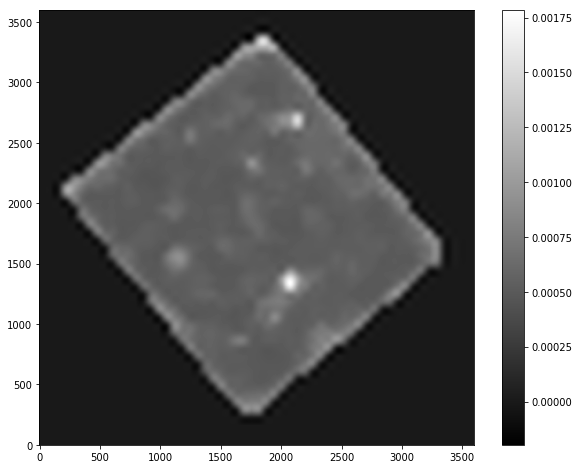

In [90]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [91]:
# subtract the background
data_sub = image_data - bkg

# Object Detection

In [92]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
# how many objects were detected
len(objects)

8640

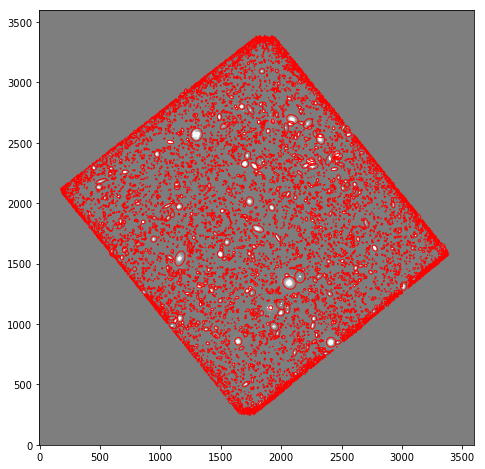

In [80]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

# Obtain image statistics

In [12]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: -0.9047293
Max: 74.44648
Mean: 0.00079129904
Stdev: 0.054868452


# Plot histogram

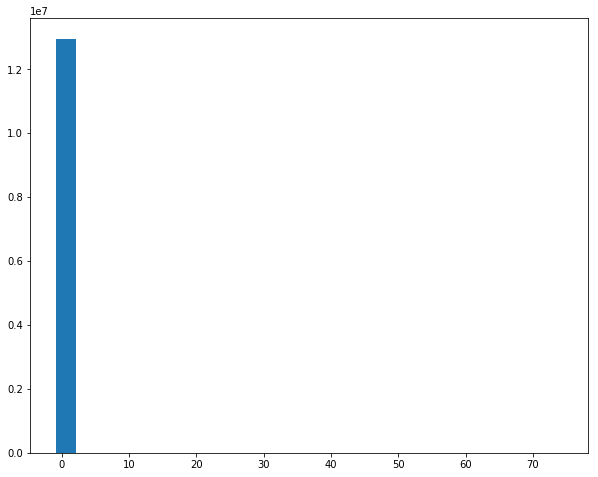

In [23]:
histogram = plt.hist(image_data.flatten(), bins='auto')

# Astropy Tutorial subtracting background subtraction/object detection

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

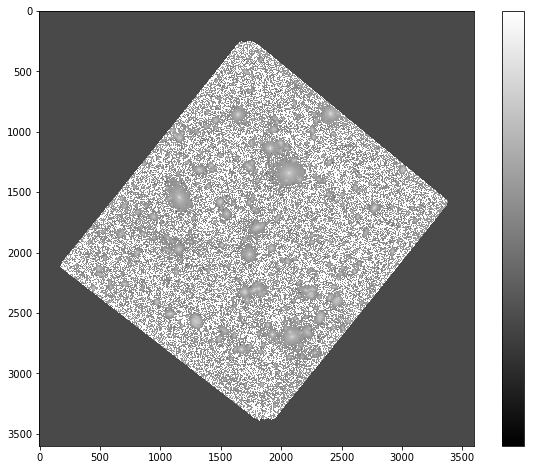

In [24]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])